<a href="https://colab.research.google.com/github/giovannaily/Deep_Learn/blob/main/RN_comparation_car_brand_logos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Federal de Pernambuco - UFPE \
Centro de Informática - CIn \
Ciência da computação - Pós graduação \
Deep Learn 2024.1 \
Student: Giovanna Ily Farias Ramalho

# Challenge 1 - RN and CNN comparation

# Image classification Logos car brand
In this section, we perform data preprocessing, model creation, and model training steps.

# goals

* Prepare image data for training
* Create and compile a simple model for image classification
* Train an image classification model and observe the results

# Logo brand car

data set: https://www.kaggle.com/datasets/volkandl/car-brand-logos?resource=download
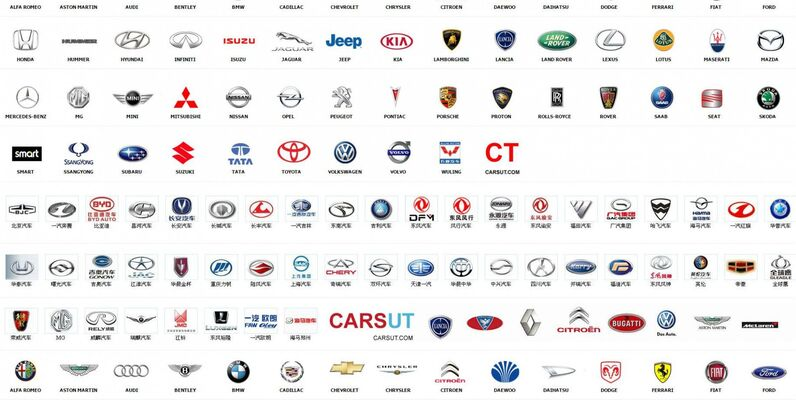

# Load data set with google drive

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/MyDrive/Car_Brand_Logos')

Mounted at /content/drive


#About Dataset

The data set has been harvested from search engines. It contains the 8 brands' logos and the stuffs which have logo on it.

Data set contains 8 logo brands including; toyota, hyundai, lexus, skoda, volkswagen, mazda, mercedes, opel. Each brand has 300~350 training photos and 50 test photos.

In [ ]:
# Import librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import zipfile
import json
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from PIL import Image

#Data vizualization

To view the images I defined a main directory and opened the folders where the images were classified by car brand logos. I selected the images and displayed them.

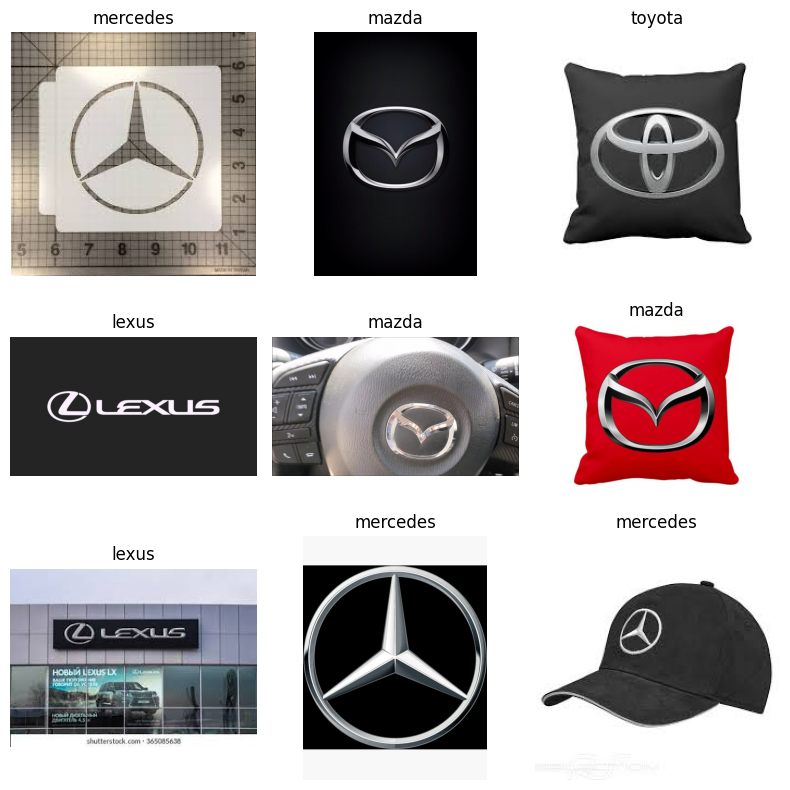

In [ ]:
# Set the main directory where the images are located
main_directory = '/content/drive/MyDrive/Car_Brand_Logos/Train/'

# Create the mapping of file paths to information
mapping = {}

# Iterate over folders within the main directory
for folder_name in os.listdir(main_directory):
    folder_path = os.path.join(main_directory, folder_name)
    if os.path.isdir(folder_path):
        # Iterate over the image files within each folder
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg'):
                file_path = os.path.join(folder_path, filename)
                label = folder_name  # Use folder name as label
                mapping[file_path] = {'label': label}

# Check that there are at least 9 images available
if len(mapping) >= 9:
    selected_images = random.sample(list(mapping.items()), 9)
else:
    selected_images = list(mapping.items())  # Use all available images

# View selected images
plt.figure(figsize=(8, 8))

for i, (file_path, info) in enumerate(selected_images):
    img = mpimg.imread(file_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(info['label'])
    plt.axis("off")

plt.tight_layout()
plt.show()  # Display the images

# Read the data
convert the images to numeric arrays and have a look.

In [ ]:
# Function that reads images and their labels
def read_images(mapp):
    images, labels = [], []
    for i, (file_path, info) in enumerate(list(mapp.items())):
        labels.append(mapp[file_path]['label'])
        image = Image.open(file_path)
        image = image.resize((100, 100))
        image = image.convert("RGB")
        pixels = np.array(image)
        images.append(pixels)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [ ]:
# Extracting the labels
labels = []
for file_path in mapping.keys():
    labels.append(mapping[file_path]['label'])
labels = list(set(labels))
labels.sort()
#labels

In [ ]:
# Label dictionary
gems_map = dict(zip(labels, [i for i in range(len(labels))]))

In [ ]:
# New label mapping
mapping_2 = mapping
for path in mapping_2.keys():
    mapping_2[path]['label'] = gems_map[mapping_2[path]['label']]

In [ ]:
# Getting the data
imgs, labels = read_images(mapping_2)
imgs.shape, labels.shape

((2522, 100, 100, 3), (2522,))

In [ ]:
# finding the number of elements
total_elements = np.size(imgs)
print("Number of elements:", total_elements)


Number of elements: 75660000


In [ ]:
# Resizing the data to 75660000 elements
imgs = imgs.reshape(2522, 30000)


In [ ]:
data = pd.DataFrame(imgs)
data['label'] = labels

##num_col = len(t_i.columns)
##pixels = {t_i.columns[i]: f'pixel{i+1}' for i in range(num_col - 1)}
##pixels[t_i.columns[-1]] = 'label'
##t_i.rename(columns=pixels, inplace=True)
##t_i.to_csv('gems_train.csv', index=False) # Extraindo csv para a próxima atividade

data = np.array(data)

In [ ]:
# Shuffling the instances
np.random.seed(42)
np.random.shuffle(data)

# Data exploration

In [ ]:
# Visualizando os dados
df = pd.DataFrame(data)
num_col = len(df.columns)
pixels = {df.columns[i]: f'pixel{i+1}' for i in range(num_col - 1)}
pixels[df.columns[-1]] = 'label'
df.rename(columns=pixels, inplace=True)
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel29992,pixel29993,pixel29994,pixel29995,pixel29996,pixel29997,pixel29998,pixel29999,pixel30000,label
0,14,14,14,14,14,14,14,14,14,16,...,49,49,49,52,52,51,53,52,50,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
# Visualizando os dados
df = pd.DataFrame(data)
num_col = len(df.columns)
pixels = {df.columns[i]: f'pixel{i+1}' for i in range(num_col - 1)}
pixels[df.columns[-1]] = 'label'
df.rename(columns=pixels, inplace=True)
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel29992,pixel29993,pixel29994,pixel29995,pixel29996,pixel29997,pixel29998,pixel29999,pixel30000,label
0,14,14,14,14,14,14,14,14,14,16,...,49,49,49,52,52,51,53,52,50,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


# Graphs

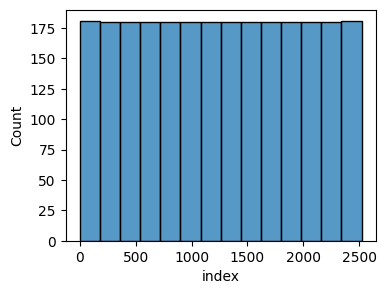

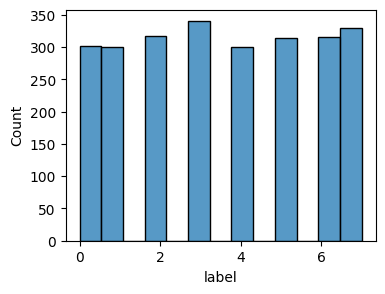

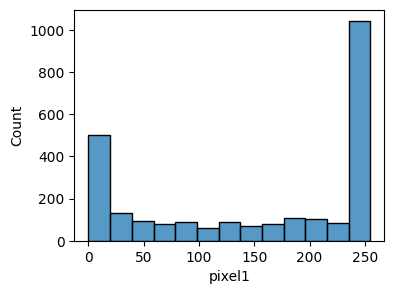

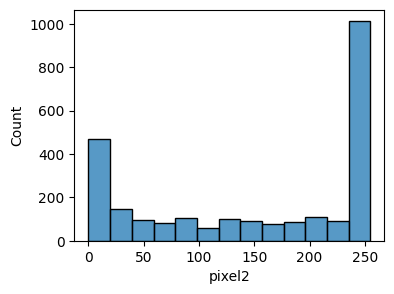

In [ ]:
# Histogramas
plt.figure(figsize=(4, 3))
sns.histplot(df.index)
plt.xlabel('index')

plt.figure(figsize=(4, 3))
sns.histplot(df['label'])
plt.xlabel('label')

plt.figure(figsize=(4, 3))
sns.histplot(df['pixel1'])
plt.xlabel('pixel1')

plt.figure(figsize=(4, 3))
sns.histplot(df['pixel2'])
plt.xlabel('pixel2')

plt.show()

# removing the labels

We store the data in the variable `x` and its labels in the variable `y`.

In [ ]:
x = data[:, :-1]
y = data[:, -1]

# Separating the data

We store the training and validation sets in the variables `x_train` and `x_val`, and their respective labels in `y_train` and `y_val`. We perform a stratified split using 20% ​​of the data set for validation.

In [ ]:
# Separating training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

# Summary of training and validation data

We have 2017 images with 30000 pixels for training each

In [ ]:
x_train.shape

(2017, 30000)

and their corresponding labels

In [ ]:
y_train.shape

(2017,)

For validation, we have 505 images

In [ ]:
x_val.shape

(505, 30000)

and their corresponding labels

In [ ]:
y_val.shape

(505,)

# Normalizing the images

We continue normalizing the image data, so that instead of the pixel values ​​being between 0 and 255, they are now between 0 and 1:

In [ ]:
# Original minimum and maximum values
x_train.min(), x_train.max()

(0, 255)

In [ ]:
# Normalization
x_train = x_train/255.0
x_val = x_val/255.0
x_train.shape, x_val.shape

((2017, 30000), (505, 30000))

In [ ]:
# Minimum and maximum values ​​after normalization
x_train.min(), x_train.max()

(0.0, 1.0)

In [ ]:
y_val.shape

(505,)

# Categorizing the labels

Let's categorically encode the labels using the [keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) method. We pass the values ​​to be encoded and the number of categories to be encoded.

In [ ]:
# Performing coding of categories
num_classes = 88

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

Labels are now represented as *crisp* partitions.

In [ ]:
y_train[298]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

# Building the model

The data is prepared, we have normalized images for training and validation, and categorical labels for both.

Here we will build a sequential model that:
* It has a fully connected input layer, with 512 neurons, uses the `relu` activation function, and expects input images with the format `(30000,)`.
* Has one or more fully connected hidden layers, with 512 neurons, which also use the `relu` activation function. Each neuron can affect the network's guess with its weights, which are updated over many iterations as the network gives feedback on its performance and learns.
* Has a fully connected output layer, equal to the number of classes, and uses the `softmax` activation function. The output layer provides the network's guess for a given image.

We create the `model` variable to store the model. We import the [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model class from Keras and the [Dense](https://www.tensorflow.org/) layer class api_docs/python/tf/keras/layers/Dense).

In [ ]:
# Instantiating the model
model = keras.Sequential([
    keras.Input((100*100*3,)), # Input layer
    layers.Dense(512, activation='relu'), # First hidden layer
    layers.Dense(512, activation='relu'), # Second hidden layer
    layers.Dense(88, activation='softmax'), # Output layer
])

# model summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               15360512  
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 88)                45144     
                                                                 
Total params: 15668312 (59.77 MB)
Trainable params: 15668312 (59.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compiling the model

We perform [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) on the model using [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf /keras/losses/CategoricalCrossentropy) to reflect the fact that we want to classify each example into one of many categories, and measure the accuracy of the model:

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model

We use the model's `fit` method to train it for 20 epochs using the images and labels from the training and validation data created previously:

In [ ]:
history = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_val, y_val))

Epoch 1/20
64/64 [==============================] - 29s 444ms/step - loss: 13.4941 - accuracy: 0.1334 - val_loss: 4.5879 - val_accuracy: 0.1248
Epoch 2/20
64/64 [==============================] - 18s 280ms/step - loss: 2.5137 - accuracy: 0.1517 - val_loss: 3.0151 - val_accuracy: 0.1485
Epoch 3/20
64/64 [==============================] - 18s 279ms/step - loss: 2.2311 - accuracy: 0.1646 - val_loss: 2.4150 - val_accuracy: 0.1248
Epoch 4/20
64/64 [==============================] - 20s 311ms/step - loss: 2.1057 - accuracy: 0.1820 - val_loss: 2.3813 - val_accuracy: 0.1406
Epoch 5/20
64/64 [==============================] - 18s 276ms/step - loss: 2.2197 - accuracy: 0.2003 - val_loss: 2.2747 - val_accuracy: 0.1703
Epoch 6/20
64/64 [==============================] - 18s 276ms/step - loss: 2.1181 - accuracy: 0.2147 - val_loss: 2.1412 - val_accuracy: 0.1366
Epoch 7/20
64/64 [==============================] - 19s 291ms/step - loss: 2.0572 - accuracy: 0.2102 - val_loss: 3.1452 - val_accuracy: 0.154

# graph for training and validation loss

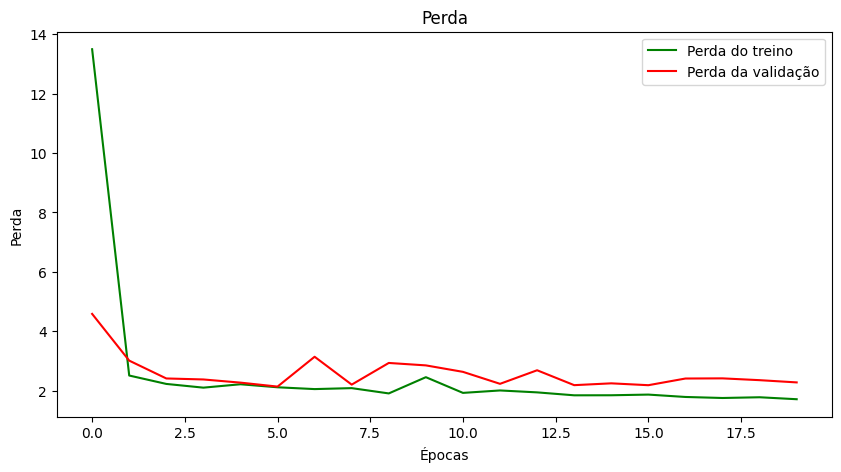

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(history.epoch, history.history["loss"], 'g', label='Perda do treino')
ax.plot(history.epoch, history.history["val_loss"], 'r', label='Perda da validação')
ax.set_title('Perda')
ax.set_xlabel('Épocas')
ax.set_ylabel('Perda')
ax.legend()
plt.show()

#Conclusão

The results of the model training show a mixed performance. The accuracy on the training data starts at around 13.34% in the first epoch and increases gradually to approximately 33.71% by the last epoch. Similarly, the accuracy on the validation data starts at about 12.48% and fluctuates throughout training, reaching around 19.80% at the end of the 20 epochs.

These accuracies can be considered relatively low, especially in the context of many machine learning tasks where higher accuracies are often desired. However, it's important to note that the dataset and the complexity of the task greatly influence what can be considered a "good" accuracy.

In conclusion, while the model's performance improved slightly during training, the overall accuracy is still not high. Further optimization of the model architecture, hyperparameters tuning, or possibly using more advanced techniques may be necessary to achieve better results.